# Cost Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem Statement

**Housing Price Prediction**

We have a simple data set with only two data points - a house with 1000 square feet(sqft) sold for 300,000 dollars and a house with 2000 square feet sold for 500,000 dollars. These two points will constitute our *data or training set*. The units of size are 1000 sqft and the units of price are 1000s of dollars.

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------- | ------------------------ |
| 1.0                  | 300                      |
| 2.0                  | 500                      |

We would like to fit a linear regression model through these two points, so we can then predict price for other houses - say, a house with 1200 sqft.

In [2]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


## Model Function

The model function for linear regression (which is a function that maps from `x` to `y`) is represented as
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

In [3]:
def compute_model_output(x, w, b):
    """
    Computes the predection of a linear model

    Args:
        x (ndarray (m,)): Data, m examples
        w,b (scalar)    : model parameters
    Returns
        y (ndarray (m,)): target values
    """
    return np.array([w * xi + b for xi in x])

## Computing Cost

Cost is a measure how well our model is predicting the target price of the house.

The equation for cost with one variable is:
$$J(w,b) = \frac{1}{2m} \sum_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$

where
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the actual value and the prediction.
- These differences are summed over all the $m$ examples and divided by $2m$ to produce the cost, $J(w,b)$.

In [4]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters
    
    Returns
        total_cost (float): The cost of using w, b as the parameters for linear regression
    """
    return (1 / (2 * x.shape[0])) * sum([(f_wb - y) ** 2 for f_wb, y in zip(compute_model_output(x, w, b), y)])

Cost for (w = 200, b = 100): 0.0


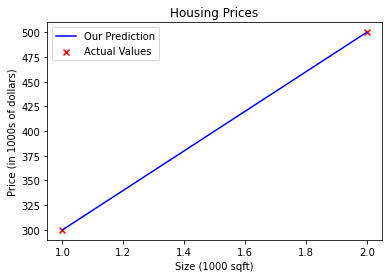

In [5]:
w, b = 200, 100
f_wb = compute_model_output(x_train, w, b)
print(f"Cost for (w = {w}, b = {b}): {compute_cost(x_train, y_train, w, b)}")

plt.plot(x_train, f_wb, c='b', label='Our Prediction')
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Values')
plt.title('Housing Prices')
plt.xlabel('Size (1000 sqft)')
plt.ylabel('Price (in 1000s of dollars)')
plt.legend()
plt.show()

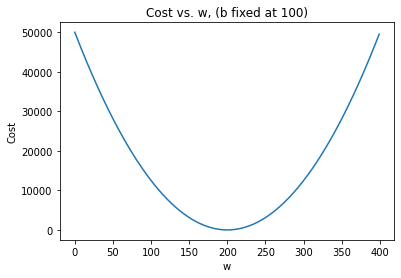

In [6]:
w_range = np.arange(200 - 200, 200 + 200)
b = 100
plt.plot(w_range, [compute_cost(x_train, y_train, wi, b) for wi in w_range])
plt.title('Cost vs. w, (b fixed at 100)')
plt.xlabel('w')
plt.ylabel('Cost')
plt.show()

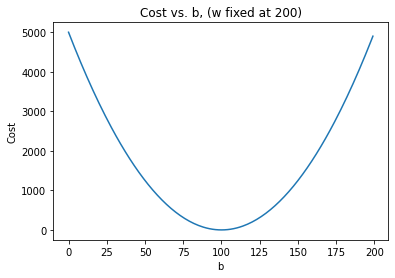

In [7]:
w = 200
b_range = np.arange(100 - 100, 100 + 100)
plt.plot(b_range, [compute_cost(x_train, y_train, w, bi) for bi in b_range])
plt.title('Cost vs. b, (w fixed at 200)')
plt.xlabel('b')
plt.ylabel('Cost')
plt.show()

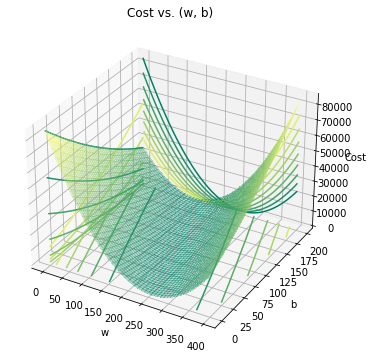

In [8]:
ax = plt.figure(figsize=(10, 6)).add_subplot(projection='3d')

w_range, b_range = np.meshgrid(np.arange(200 - 200, 200 + 200), np.arange(100 - 100, 100 + 100))
cost_range = np.array([compute_cost(x_train, y_train, wi, bi) for wi, bi in zip(w_range, b_range)])

cmap = 'summer'

ax.plot_surface(w_range, b_range, cost_range, alpha=0.3, cmap=cmap, antialiased=False)

ax.contour(w_range, b_range, cost_range, zdir='z', offset=0, cmap=cmap)
ax.contour(w_range, b_range, cost_range, zdir='x', offset=0, cmap=cmap)
ax.contour(w_range, b_range, cost_range, zdir='y', offset=200, cmap=cmap)

ax.set(xlabel='w', ylabel='b', zlabel='Cost')
plt.title('Cost vs. (w, b)')
plt.show()